Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [ ]:
df = pd.read_csv('/content/ipl_matches - ipl_matches.csv')

Understanding the data

In [ ]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# EDA Analysis

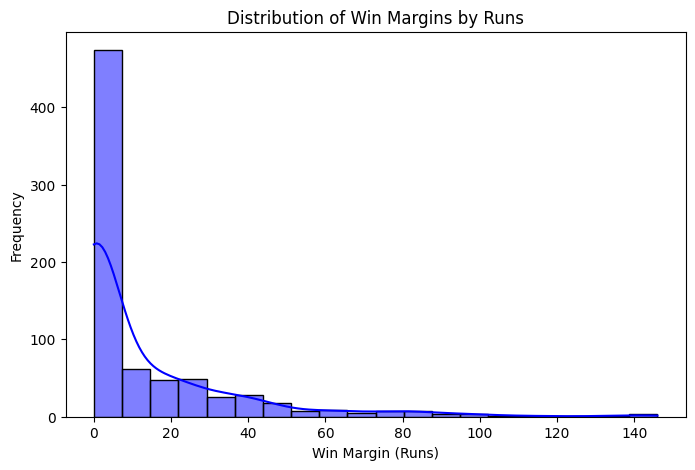

In [ ]:
# 1. Win Margin Distribution (Runs)
plt.figure(figsize=(8, 5))
sns.histplot(df["win_by_runs"], bins=20, kde=True, color="blue")
plt.xlabel("Win Margin (Runs)")
plt.ylabel("Frequency")
plt.title("Distribution of Win Margins by Runs")
plt.show()

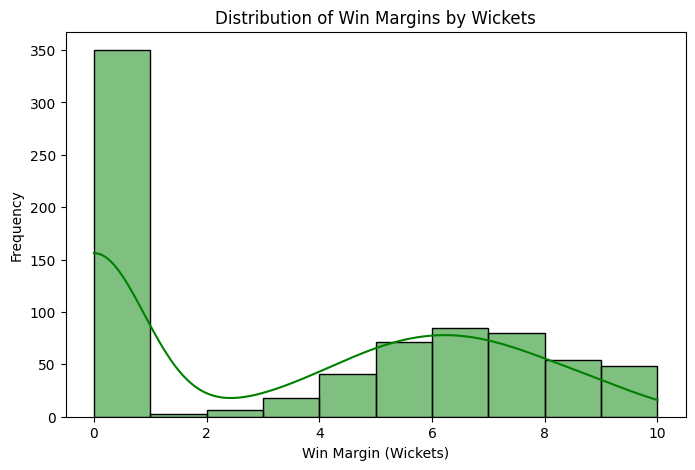

In [ ]:
# 2. Win Margin Distribution (Wickets)
plt.figure(figsize=(8, 5))
sns.histplot(df["win_by_wickets"], bins=10, kde=True, color="green")
plt.xlabel("Win Margin (Wickets)")
plt.ylabel("Frequency")
plt.title("Distribution of Win Margins by Wickets")
plt.show()

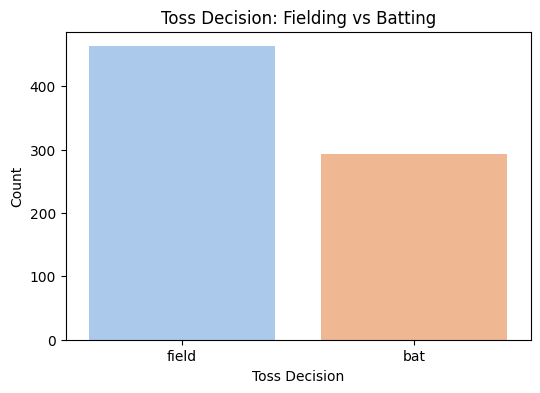

In [ ]:
# 4. Toss Decision Impact
plt.figure(figsize=(6, 4))
sns.countplot(x=df["toss_decision"], palette="pastel")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("Toss Decision: Fielding vs Batting")
plt.show()

Correlation

In [ ]:
# Encode categorical features
categorical_features = ["toss_winner", "toss_decision", "venue","team1",'team2',"win_by_runs","win_by_wickets","date","dl_applied","result","Season","city","umpire1","winner","umpire2","umpire3"]
df_encoded = df[categorical_features].apply(LabelEncoder().fit_transform)

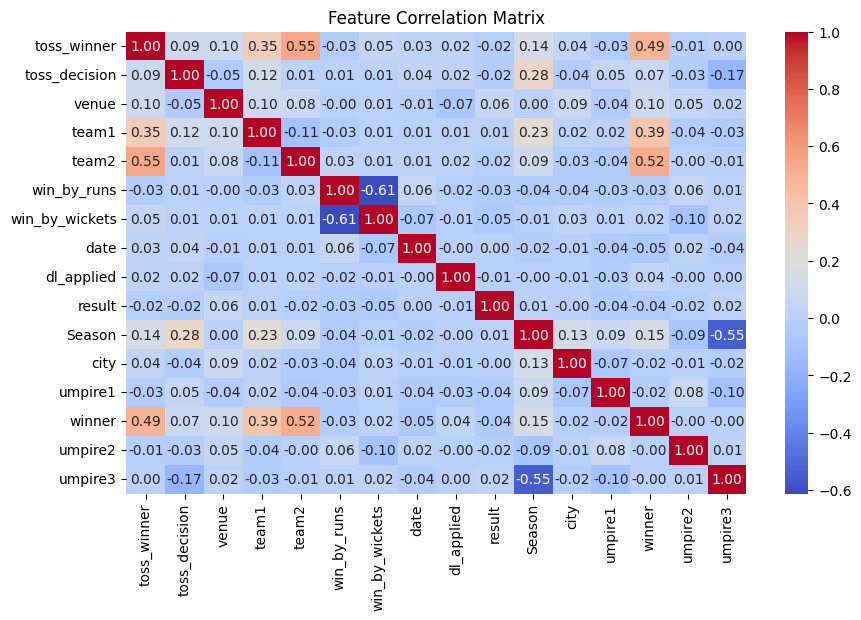

In [ ]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
X.shape,y.shape

NameError: name 'X' is not defined

Data preprocessing

In [ ]:
# Check the percentage of missing data for each column
print((df.isnull().sum() / len(df)) * 100)

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64


In [ ]:
# Convert date column to datetime format with correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')


**Most** **successful** **teams**

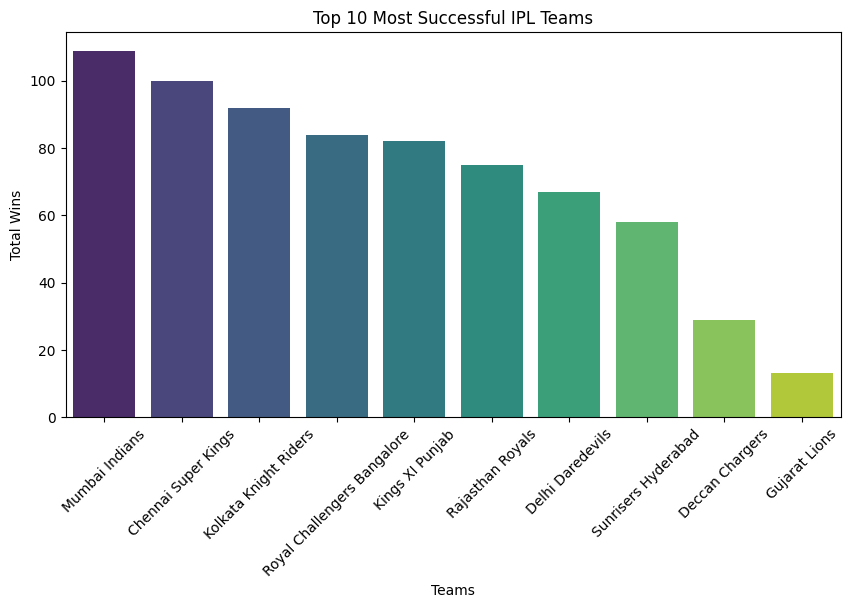

In [ ]:
# 3. Most Successful Teams
plt.figure(figsize=(10, 5))
top_teams = df["winner"].value_counts().head(10)
sns.barplot(x=top_teams.index, y=top_teams.values, palette="viridis")
plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("Top 10 Most Successful IPL Teams")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Find the player with the most Player of the Match awards
top_player = df['player_of_match'].value_counts().idxmax()

# Find the year in which this player won the most awards
df['year'] = df['date'].dt.year
top_player_year = df[df['player_of_match'] == top_player]['year'].value_counts().idxmax()

# Count the number of matches Chris Gayle won in 2011
matches_won_2011 = df[(df['player_of_match'] == top_player) & (df['year'] == top_player_year)].shape[0]

# Display results
top_player, top_player_year, matches_won_2011


('CH Gayle', np.int32(2011), 6)

In [ ]:
top_players = df["player_of_match"].value_counts().head(10)
# Display the results
top_players

,count
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
RG Sharma,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


In [ ]:
# Get the winning team for each year (assuming the dataset has final match data)
yearly_winners = df.groupby('year')['winner'].last()

# Convert to a DataFrame for better readability
yearly_winners_df = yearly_winners.reset_index()
yearly_winners_df.columns = ['Year', 'Winning Team']

# Display the result
yearly_winners_df


,Year,Winning Team
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [ ]:
# Drop unnecessary columns
df_clean = df.drop(columns=['id', 'date', 'umpire1', 'umpire2', 'umpire3', 'player_of_match', 'venue'])

In [ ]:
# Create target variable
df_clean['toss_win_match_win'] = (df_clean['toss_winner'] == df_clean['winner']).astype(int)


In [ ]:
# Convert categorical columns to numerical using Label Encoding
categorical_cols = ['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le  # Save encoders for future use


In [ ]:
# Define features (X) and target variable (y)
X = df_clean.drop(columns=['winner', 'toss_win_match_win'])  # Drop 'winner' to prevent data leakage
y = df_clean['toss_win_match_win']

# Split dataset into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show processed dataset sample
print(df_clean.head())


   Season  city  team1  team2  toss_winner  toss_decision  result  dl_applied  \
0       9    14     14     13           13              1       1           0   
1       9    26      8     11           11              1       1           0   
2       9    28      4      7            7              1       1           0   
3       9    15     11      5            5              1       1           0   
4       9     2     13      3           13              0       1           0   

   winner  win_by_runs  win_by_wickets  year  toss_win_match_win  
0      14           35               0  2017                   0  
1      11            0               7  2017                   1  
2       7            0              10  2017                   1  
3       5            0               6  2017                   1  
4      13           15               0  2017                   1  


Splitting data set into train and test

In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Model Prediction and Evaluate Model

In [ ]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Model Accuracy: 55.92%

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.54        74
           1       0.57      0.58      0.57        78

    accuracy                           0.56       152
   macro avg       0.56      0.56      0.56       152
weighted avg       0.56      0.56      0.56       152


Confusion Matrix:
 [[40 34]
 [33 45]]


Feature Scaling

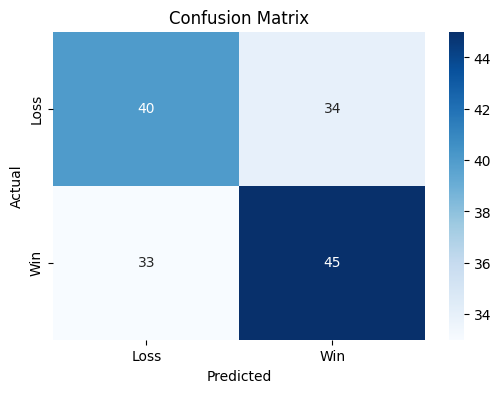

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


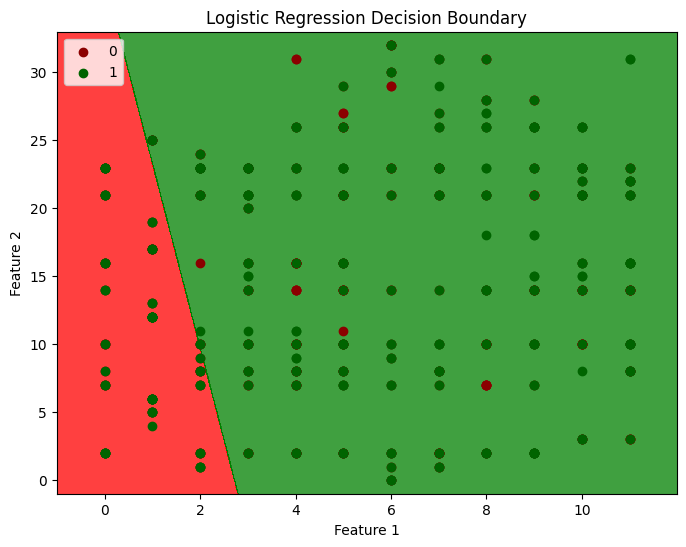

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select only two features for visualization (first two columns)
X_vis = X_train.iloc[:, [0, 1]].values  # First two numerical features
y_vis = y_train.values

# Train logistic regression again with only two features
log_reg_vis = LogisticRegression(max_iter=1000, random_state=42)
log_reg_vis.fit(X_vis, y_vis)

# Create a mesh grid
X1, X2 = np.meshgrid(
    np.arange(start=X_vis[:, 0].min() - 1, stop=X_vis[:, 0].max() + 1, step=0.01),
    np.arange(start=X_vis[:, 1].min() - 1, stop=X_vis[:, 1].max() + 1, step=0.01)
)

# Predict across the mesh grid
predictions = log_reg_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(["red", "green"]))

# Scatter plot of actual data points
for i, j in enumerate(np.unique(y_vis)):
    plt.scatter(
        X_vis[y_vis == j, 0], X_vis[y_vis == j, 1],
        color=ListedColormap(["darkred", "darkgreen"])(i),
        label=j
    )

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
